# Project Name – Credit Card Segmentation

Problem Statement -

This case requires trainees to develop a customer segmentation to define
marketing strategy. The sample dataset summarizes the usage behaviour of about 9000
active credit card holders during the last 6 months. The file is at a customer level with
18 behavioural variables.


# Goal of the model:
Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:

* Monthly average purchase and cash advance amount

* Purchases by type (one-off, installments)

* Average amount per purchase and cash advance transaction,

* Limit usage (balance to credit limit ratio),

* Payments to minimum payments ratio etc.

Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.

Identification of the relationships/ affinities between services.

Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm  to reveal the behavioural segments of credit card holders

Identify cluster characterisitics of the cluster using detailed profiling.

Provide the strategic insights and implementation of strategies for given set of cluster characteristics

# Number of attributes:

1.CUST_ID Credit card holder ID

2.BALANCE Monthly average balance (based on daily balance averages)

3.BALANCE_FREQUENCY Ratio of last 12 months with balance

4.PURCHASES Total purchase amount spent during last 12 months

5.ONEOFF_PURCHASES Total amount of one-off purchases

6.INSTALLMENTS_PURCHASES Total amount of installment purchases

7.CASH_ADVANCE Total cash-advance amount

8.PURCHASES_ FREQUENCY-Frequency of purchases (percentage of months with at least on purchase)

9.ONEOFF_PURCHASES_FREQUENCY Frequency of one-off-purchases

10.PURCHASES_INSTALLMENTS_FREQUENCY Frequency of installmentpurchases

11.CASH_ADVANCE_ FREQUENCY Cash-Advance frequency

12.AVERAGE_PURCHASE_TRX Average amount per purchase transaction

13.CASH_ADVANCE_TRX Average amount per cash-advance transaction

14.PURCHASES_TRX Average amount per purchase transaction

15.CREDIT_LIMIT Credit limit

16.PAYMENTS-Total payments (due amount paid by the customer to decrease their statement balance) in the period

17.MINIMUM_PAYMENTS Total minimum payments due in the period.

18.PRC_FULL_PAYMENT- Percentage of months with full payment of the due statement balance

19.TENURE Number of months as a customer

### Initial Observation:

From the problem statement and the input attributes we can clearly understand that this belongs to unsupervised machine learning model in which there will be no target label, every attribute has to be considered as input feature, we have to find the hidden patterns among these features and establish the hidden patterns.

# LOAD THE DATA

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:

#set working directory 

path = "C:/Users/jerin/Desktop/PYTHON WORK/PYTHON PROJECT/EDWISOR PROJECTS/CREDIT CARD SEGMENTATION"
os.chdir(path)
os.getcwd()


'C:\\Users\\jerin\\Desktop\\PYTHON WORK\\PYTHON PROJECT\\EDWISOR PROJECTS\\CREDIT CARD SEGMENTATION'

In [3]:
credit = pd.read_csv("CC GENERAL.csv")

In [4]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
credit.shape

(8950, 18)

In [7]:
# Intital descriptive analysis of data.
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


## MISSING VALUE ANALYSIS

In [8]:
# finding missing values
credit.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### Observation
* there are missing values in the data so we will have to treat them accordingly

In [9]:
credit['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

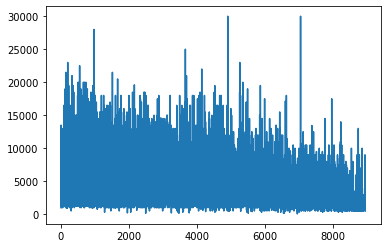

In [10]:
plt.plot(credit['CREDIT_LIMIT'])

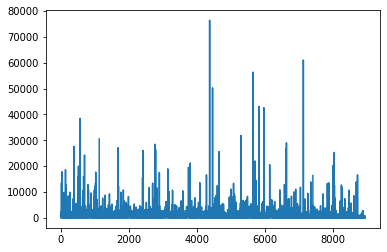

In [11]:
plt.plot(credit['MINIMUM_PAYMENTS'])

#### Observation
* From the graph we can see that there are some outlier data in the distribution of columns "CREDIT_LIMIT" and "MINIMUM_PAYMENTS" and also we don't want any data to be lost in this dataset and hence we will fill the null values with median imputation rather than mean imputation.
* This is because mean can't give the measure of central tendency if there is any outlier data available in the data distribution.

In [12]:
# imputing missing values with median
credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(),inplace=True)
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)
credit.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Deriving Key Performance Indicators(KPI)

### 1. Monthly average purchase and cash advance amount

In [13]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']

In [14]:
credit['Monthly_avg_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

In [15]:
credit['Monthly_cash_advance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

In [16]:
    credit['ONEOFF_PURCHASES'][credit['ONEOFF_PURCHASES']==0].count()

4302

### 2. Purchase_type
* To find what type of purchases customers are making on credit card, lets explore the data.

In [17]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(20)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


In [18]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [19]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [20]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [21]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

#### Observations:
We can see that there are <b>four types of customers</b> in the entire dataset, they are 
* Customers who do only oneoff purchase transactions
* Customers who do only installment purchase transaction
* Customers who do both oneoff purchase and installment purchase transactions
* Customers who neither do oneoff purchase transactions nor installment purchase transactions.

So deriving a categorical variable based on the behaviour.

In [22]:
def purchase(credit):   
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both one_off & installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [23]:
credit['purchase_type']=credit.apply(purchase,axis=1)

In [24]:
credit['purchase_type'].value_counts()


both one_off & installment    2774
installment                   2260
none                          2042
one_off                       1874
Name: purchase_type, dtype: int64

### 3. Limit_Usage (balance to credit limit ratio)
* Lower value implies customers are maintaining thier balance properly. Lower value means good credit score

In [25]:
credit['limit_usage']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [26]:
credit['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

### 4. Payment to minimum payments Ratio

In [27]:
credit['payment_minpay']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)
credit['payment_minpay'].head()


0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: payment_minpay, dtype: float64

In [28]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## OUTLIER ANALYSIS

In [29]:
##make the function to check the outlier
def boxplot(value):
    return value.plot.box()

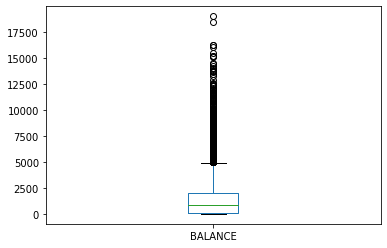

In [30]:
boxplot(credit['BALANCE']) ##We can see there are many outlier

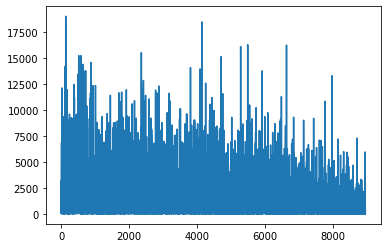

In [31]:
plt.plot(credit['BALANCE'])

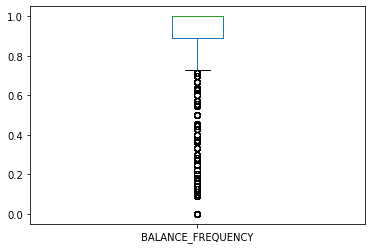

In [32]:
boxplot(credit['BALANCE_FREQUENCY'])

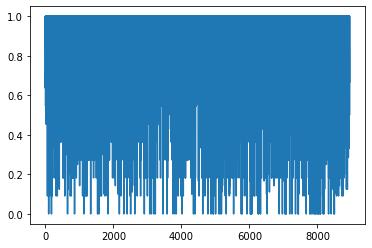

In [33]:
plt.plot(credit['BALANCE_FREQUENCY'])

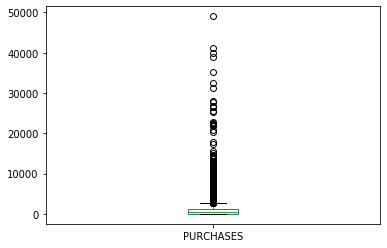

In [34]:
boxplot(credit['PURCHASES'])

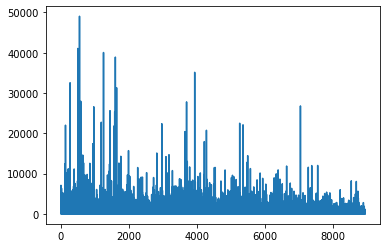

In [35]:
plt.plot(credit['PURCHASES'])

#### Observations:
* From the above description of some variables we can see that there is high variance among the values and this leads to the skewness in the data. 
* Hence to avoid this we will be applying log transformation on all the variables present in the dataset, this solves the problem of skewness.

In [36]:
# log tranformation
cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [54]:
cr_log

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,...,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,...,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,0.376719,1.574068
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,...,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,...,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949,4.835620,2.898616,0.200671,0.000000
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,...,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,0.693147,5.677165,0.000000,5.677165,0.000000,0.693147,0.000000,0.606136,0.000000,...,1.945910,6.908755,5.788719,3.909748,0.405465,1.945910,3.902377,0.000000,0.028095,2.036042
8946,3.004851,0.693147,5.707110,0.000000,5.707110,0.000000,0.693147,0.000000,0.606136,0.000000,...,1.945910,6.908755,5.623517,5.747301,0.000000,1.945910,3.931826,0.000000,0.019002,0.632971
8947,3.194529,0.606136,4.979489,0.000000,4.979489,0.000000,0.606136,0.000000,0.510826,0.000000,...,1.791759,6.908755,4.410016,4.423869,0.223144,1.945910,3.221539,0.000000,0.023129,0.686161
8948,2.671218,0.606136,0.000000,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.154151,...,0.000000,6.216606,3.980615,4.038755,0.223144,1.945910,0.000000,1.959127,0.026559,0.663978


In [37]:
cr_log.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,6.161637,2.013303,0.000000,4.861995,6.773521,7.628099,9.854515
BALANCE_FREQUENCY,8950.0,0.619940,0.148590,0.000000,0.635989,0.693147,0.693147,0.693147
PURCHASES,8950.0,4.899647,2.916872,0.000000,3.704627,5.892417,7.013133,10.800403
ONEOFF_PURCHASES,8950.0,3.204274,3.246365,0.000000,0.000000,3.663562,6.360274,10.615512
INSTALLMENTS_PURCHASES,8950.0,3.352403,3.082973,0.000000,0.000000,4.499810,6.151961,10.021315
CASH_ADVANCE,8950.0,3.319086,3.566298,0.000000,0.000000,0.000000,7.016449,10.760839
PURCHASES_FREQUENCY,8950.0,0.361268,0.277317,0.000000,0.080042,0.405465,0.650588,0.693147
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.158699,0.216672,0.000000,0.000000,0.080042,0.262364,0.693147
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.270072,0.281852,0.000000,0.000000,0.154151,0.559616,0.693147
CASH_ADVANCE_FREQUENCY,8950.0,0.113512,0.156716,0.000000,0.000000,0.000000,0.200671,0.916291


In [55]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

In [56]:
cr_pre

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.693147,0.000000,5.677165,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,3.902377,0.000000,0.028095,2.036042
8946,0.693147,0.000000,5.707110,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,3.931826,0.000000,0.019002,0.632971
8947,0.606136,0.000000,4.979489,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,3.221539,0.000000,0.023129,0.686161
8948,0.606136,0.000000,0.000000,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,0.000000,1.959127,0.026559,0.663978


# Finding insights from the data

In [39]:
# Average payment_minpayment ratio for each purchase type.
x=credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

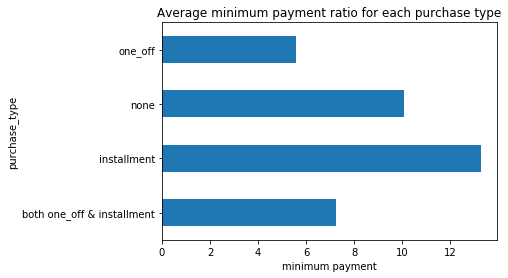

In [40]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay'])).plot.barh()
plt.title('Average minimum payment ratio for each purchase type')
plt.xlabel('minimum payment');

#### Insight 1: Customers who make transactions in installments are paying the amount regularly

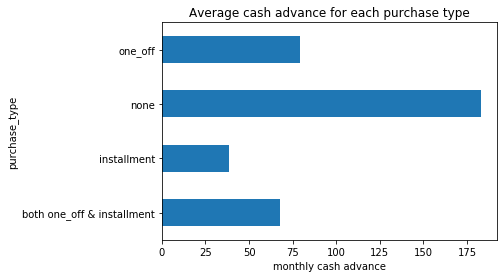

In [41]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()
plt.title('Average cash advance for each purchase type')
plt.xlabel('monthly cash advance');

#### Insight 2: Customers who neither make a transaction in one_off payments nor installments are having high monthly cash advances

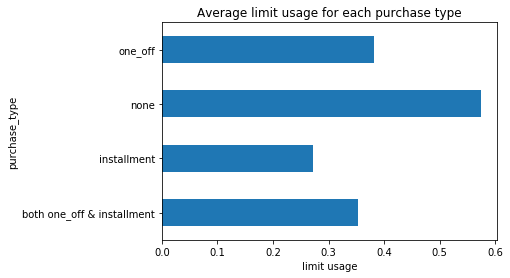

In [42]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()
plt.title('Average limit usage for each purchase type')
plt.xlabel('limit usage');

#### Insight 3: Less limit usage gives high credit score and the good score is with the customers who make transactions in installments

# Dataset Preparations for model selection

In [43]:
# Original dataset with categorical column converted to number type.
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)

In [57]:
cre_original

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay,both one_off & installment,installment,none,one_off
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,12,7.950000,0.000000,installment,0.040901,1.446508,0,1,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,12,0.000000,536.912124,none,0.457495,3.826241,0,0,1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,12,64.430833,0.000000,one_off,0.332687,0.991682,0,0,0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,12,124.916667,17.149001,one_off,0.222223,0.000000,0,0,0,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,12,1.333333,0.000000,one_off,0.681429,2.771075,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,6,48.520000,0.000000,installment,0.028494,6.660231,0,1,0,0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,6,50.000000,0.000000,installment,0.019183,0.883197,0,1,0,0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,6,24.066667,0.000000,installment,0.023399,0.986076,0,1,0,0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,6,0.000000,6.093130,none,0.026915,0.942505,0,0,1,0


In [44]:
cre_original.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


In [59]:
cr_pre['purchase_type']=credit.loc[:,'purchase_type']

C:\Users\jerin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
cr_pre

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,installment
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,none
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,one_off
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,one_off
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,one_off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.693147,0.000000,5.677165,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,3.902377,0.000000,0.028095,2.036042,installment
8946,0.693147,0.000000,5.707110,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,3.931826,0.000000,0.019002,0.632971,installment
8947,0.606136,0.000000,4.979489,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,3.221539,0.000000,0.023129,0.686161,installment
8948,0.606136,0.000000,0.000000,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,0.000000,1.959127,0.026559,0.663978,none


In [47]:
df_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)
df_dummy.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type,both one_off & installment,installment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,installment,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,none,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,one_off,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,one_off,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,one_off,0,0,0,1


In [48]:
df_dummy=df_dummy.drop(['purchase_type'],axis=1)

In [49]:
df_dummy.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,both one_off & installment,installment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,0,0,0,1


In [50]:
df_dummy.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE_FREQUENCY,8950.0,0.619940,0.148590,0.0,0.635989,0.693147,0.693147,0.693147
ONEOFF_PURCHASES,8950.0,3.204274,3.246365,0.0,0.000000,3.663562,6.360274,10.615512
INSTALLMENTS_PURCHASES,8950.0,3.352403,3.082973,0.0,0.000000,4.499810,6.151961,10.021315
PURCHASES_FREQUENCY,8950.0,0.361268,0.277317,0.0,0.080042,0.405465,0.650588,0.693147
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.158699,0.216672,0.0,0.000000,0.080042,0.262364,0.693147
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.270072,0.281852,0.0,0.000000,0.154151,0.559616,0.693147
CASH_ADVANCE_FREQUENCY,8950.0,0.113512,0.156716,0.0,0.000000,0.000000,0.200671,0.916291
CASH_ADVANCE_TRX,8950.0,0.817570,1.009316,0.0,0.000000,0.000000,1.609438,4.820282
PURCHASES_TRX,8950.0,1.894731,1.373856,0.0,0.693147,2.079442,2.890372,5.883322
Monthly_avg_purchase,8950.0,3.050877,2.002823,0.0,1.481458,3.494587,4.587295,8.315721


Finding the correlation among the variables in dataset

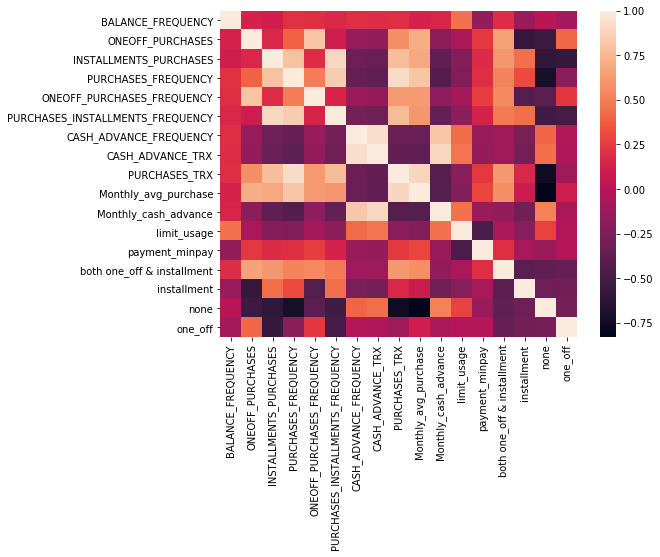

In [51]:
plt.subplots(figsize=(8, 6))
sns.heatmap(df_dummy.corr())

#### Observation
* The variables available for the model selection are very high in this dataset and this leads to dimensionality curse. In order to reduce the high dimensionality curse we will use Principal Component Analysis technique.
* Before applying PCA we will standardize data to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.So we use standard scaler technique if there are any weightage issues among the variables of the dataset.


<b>Standardrizing data</b>

To put data on the same scale

In [61]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
df_scaled=sc.fit_transform(df_dummy)

In [62]:
from sklearn.decomposition import PCA
var_ratio={}
for n in range(4,17):
    pc=PCA(n_components=n,svd_solver='full')
    df_pca=pc.fit(df_scaled)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

In [63]:
var_ratio

{4: 0.8115442762351257,
 5: 0.8770555795291428,
 6: 0.9186492443512615,
 7: 0.941092525603013,
 8: 0.9616114053683061,
 9: 0.9739787081990645,
 10: 0.9835896584630706,
 11: 0.9897248107341953,
 12: 0.9927550009135226,
 13: 0.9953907562385423,
 14: 0.9979616898169592,
 15: 0.9996360473172953,
 16: 0.9999999999999998}

In [ ]:
pd.Series(var_ratio).plot();

#### Observation 
* From the above variance ratio we can see that the maximum variance of about <b>87%</b> is explained when the number of components are 5. Hence we choose n_components as 5 to reduce the dimensionality in the datset.

In [64]:
df_scaled.shape

(8950, 17)

In [65]:
pc_final=PCA(n_components=5,svd_solver='full').fit(df_scaled)
reduced_df=pc_final.fit_transform(df_scaled)

In [66]:
df1=pd.DataFrame(reduced_df)
df1.head()

,0,1,2,3,4
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929
2,1.287396,1.508938,2.709966,-1.892252,0.010809
3,-1.047613,0.673103,2.501794,-1.306784,0.761348
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969


In [67]:
df1.shape

(8950, 5)

In [68]:
col_list=df_dummy.columns
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both one_off & installment', 'installment', 'none', 'one_off'],
      dtype='object')

In [69]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(5)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971
Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147


In [70]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
dtype: float64

# Model Selection

## Clustering
Based on our intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with <b>4 clusters.</b>



In [71]:
from sklearn.cluster import KMeans

In [72]:
km_4=KMeans(n_clusters=4,random_state=42)
km_4.fit(reduced_df)
km_4.labels_

array([0, 1, 3, ..., 0, 1, 3])

In [73]:
pd.Series(km_4.labels_).value_counts()

2    2758
0    2228
1    2090
3    1874
dtype: int64

<b>Here we do not have known k value so we will find the K. To do that we need to take a cluster range between 1 and 21. </b>

In [74]:
# Identify cluster errors
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_df )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here

In [75]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,133444.006425
1,2,87022.449335
2,3,64498.163618
3,4,43508.394061
4,5,36826.483543
5,6,32005.216927
6,7,28621.301522
7,8,26130.444993
8,9,24167.386138
9,10,22072.617284


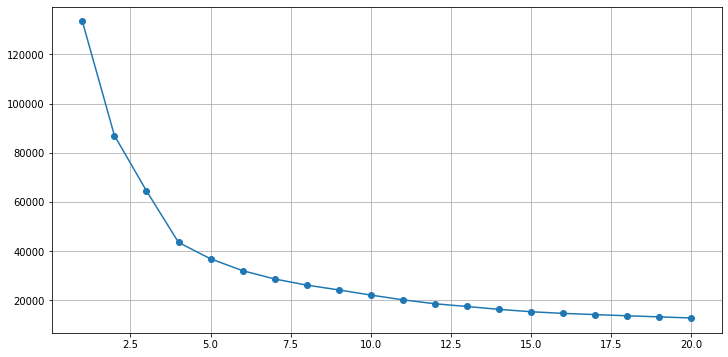

In [76]:
# checking k value from elbow plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.grid()
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

* From above graph, it is can take we can take k as 4,5 or 6

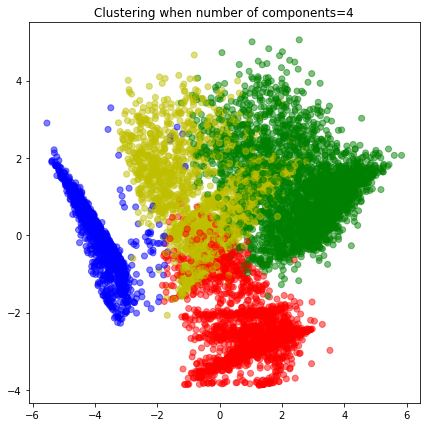

In [77]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=label_color,cmap='Spectral',alpha=0.5)
plt.title('Clustering when number of components=4');

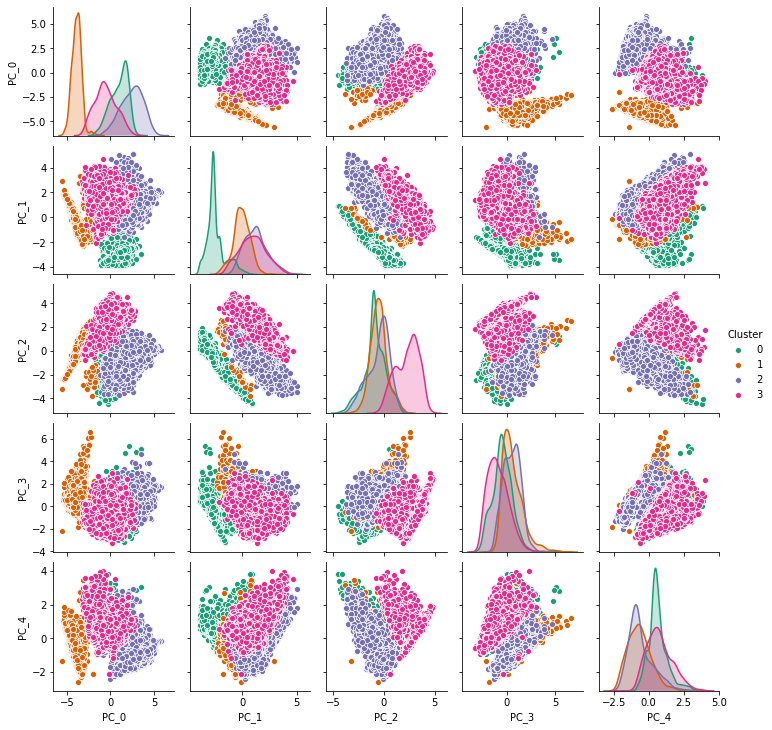

In [78]:
df_pair_plot=pd.DataFrame(reduced_df,columns=['PC_' +str(i) for i in range(5)])
df_pair_plot['Cluster']=km_4.labels_
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',height=2)
plt.savefig("pairplot")

# Observations:
From the above graphs we can conclude that the only PC_0 and PC_1 are identifiable clusters and hence we go with further analysis by increasding the number of clusters value to identify more number of insights about the customers present in the dataset.

In [79]:
# Key performace variable selection . here i am dropping varibales which are used in derving new KPI

col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both one_off & installment','installment','one_off','none','CREDIT_LIMIT']

In [80]:
cr_pre.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE_FREQUENCY,8950.0,0.619940,0.148590,0.0,0.635989,0.693147,0.693147,0.693147
ONEOFF_PURCHASES,8950.0,3.204274,3.246365,0.0,0.000000,3.663562,6.360274,10.615512
INSTALLMENTS_PURCHASES,8950.0,3.352403,3.082973,0.0,0.000000,4.499810,6.151961,10.021315
PURCHASES_FREQUENCY,8950.0,0.361268,0.277317,0.0,0.080042,0.405465,0.650588,0.693147
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.158699,0.216672,0.0,0.000000,0.080042,0.262364,0.693147
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.270072,0.281852,0.0,0.000000,0.154151,0.559616,0.693147
CASH_ADVANCE_FREQUENCY,8950.0,0.113512,0.156716,0.0,0.000000,0.000000,0.200671,0.916291
CASH_ADVANCE_TRX,8950.0,0.817570,1.009316,0.0,0.000000,0.000000,1.609438,4.820282
PURCHASES_TRX,8950.0,1.894731,1.373856,0.0,0.693147,2.079442,2.890372,5.883322
Monthly_avg_purchase,8950.0,3.050877,2.002823,0.0,1.481458,3.494587,4.587295,8.315721


In [81]:
# Concatenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [82]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both one_off & installment,installment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,0
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,3
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,3
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,3


In [83]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,12.053860,0.045933,33.125453,7.118997
Monthly_avg_purchase,47.573598,0.159337,193.696083,69.758276
Monthly_cash_advance,33.489846,186.298043,67.620006,77.843485
limit_usage,0.264275,0.576217,0.354487,0.378727
CASH_ADVANCE_TRX,1.019300,6.552632,2.807107,2.864995
payment_minpay,13.402660,9.927979,7.268605,5.561421
both one_off & installment,0.001795,0.002392,1.000000,0.003735
installment,0.998205,0.017225,0.000000,0.000000
one_off,0.000000,0.003349,0.000000,0.996265
none,0.000000,0.977033,0.000000,0.000000


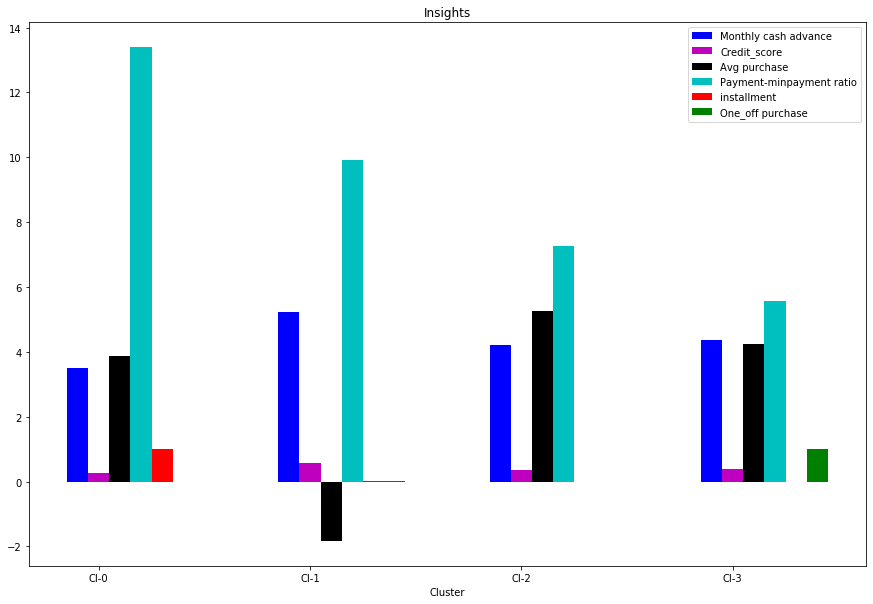

In [84]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

#### Observation
* From the above graph we can see that the four clusters have been categorised perfectly so that the difference in each cluster can be understood

In [ ]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s,'\n')

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print( "Cluster -4 ",'\n')
print(pd.concat([pd.Series(s.values,name='Size'),per],axis=1),'\n')

### Exploring the insights if the number of cluster=5

In [ ]:
#kmeans with 5 clusters
km_5=KMeans(n_clusters=5,random_state=42)
km_5=km_5.fit(reduced_df)
km_5.labels_

In [ ]:
pd.Series(km_5.labels_).value_counts()

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0');
plt.ylabel('PC_1');

In [ ]:
cluster_df_5=pd.concat([cre_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [ ]:
# Finding Mean of features for each cluster
five_cluster=cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

five_cluster

In [ ]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print(s1)

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(five_cluster.columns))

cash_advance=np.log(five_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(five_cluster.loc['limit_usage',:].values)
purchase= np.log(five_cluster.loc['Monthly_avg_purchase',:].values)
payment=five_cluster.loc['payment_minpay',:].values
installment=five_cluster.loc['installment',:].values
one_off=five_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4'))
plt.legend()

#### Observation
* From the above graph, we can't come to a particular conclusion regarding the behaviour of customer groups, because cluster 2 is having highest average purchases in the transactions, but at the same time cluster1 has highest cash advance and second highest purchases.

In [ ]:
# percentage of each cluster
print("Cluster-5")
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print(pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

### Exploring the insights if the number of cluster=6

In [ ]:
km_6=KMeans(n_clusters=6).fit(reduced_df)
km_6.labels_

In [ ]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [ ]:
cluster_df_6=pd.concat([cre_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [ ]:
six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['installment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))
plt.legend()

#### Observation:
* From the above graph we can see that cluster 2 and cluster 4 have similar behavior regarding the parameters, hence distinguishing between the clusters is hard when we have the number of clusters as 6

In [ ]:
cash_advance=np.log(six_cluster.iloc[2,:].values)
credit_score=list(six_cluster.iloc[3,:].values)
print(cash_advance)
print(credit_score)

## Checking performance metrics for Kmeans
* I am validating performance with 2 metrics Calinski harabaz and Silhouette score

In [ ]:
from sklearn.metrics import calinski_harabasz_score,silhouette_score
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_df)
    score_c[n]=calinski_harabasz_score(reduced_df,km_score.labels_)
    score[n]=silhouette_score(reduced_df,km_score.labels_)

In [ ]:
print(score)

In [ ]:
pd.Series(score).plot()
plt.title('silhouette_score')

In [ ]:
print(score_c)

In [ ]:
pd.Series(score_c).plot()
plt.title('calinski_harabasz_score')

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(reduced_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Observation:
* From all the above graphs we can conclude the performance of the KMeans Model regarding the explaination of data distribution and measure of spread is highest when we consider the number of cluster as <b>four.</b>

# Final KMeans Model

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

# Marketing Strategies

# Cluster 0:
* Customers who fall under this category of cluster are having the best credit card and also paying the dues on time without defaults. Hence these group of customers must rewarded with reward points and thus make them do more transactions in future.


# Cluster1:
* Customers belong to this category of cluster having the highest cash advance and poor credit score yet these customers pay the due amounts of the installments on time.Hence these customers may be given with the loan amounts at less interest charges, thus help the banks providing continuous services to these group of customers in future

# Cluster2:
* Customers belong to this cluster must be the primary focus regarding the marketing strategy because the customers under this cluster are making frequent purchases and also paying the dues on time thus maintaining good credit score. Customers in this cluster must be given with good reward points and provided with increased credit limit or the premium credit cards with some exciting offers make them do more transactions in the future.

# Cluster3:
* Customers belong to this cluster has the least minimum payment ratio and always does the one off payment transactions, hence no bank offers can excite these kind of cutomers. The marketing to this group of customers is hard and when the usage  is minimum, this group can be ignored from the marketing strategy.Further the customers falling under this category can be rejected from issuing the credit cards in future.